## Optional Lab - Simple Neural Network


## Data set


In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from utils import load_coffee_data, plt_roast

torch.set_default_dtype(torch.float64)

X, Y = load_coffee_data()
print(X.shape, Y.shape)

torch.Size([200, 2]) torch.Size([200, 1])


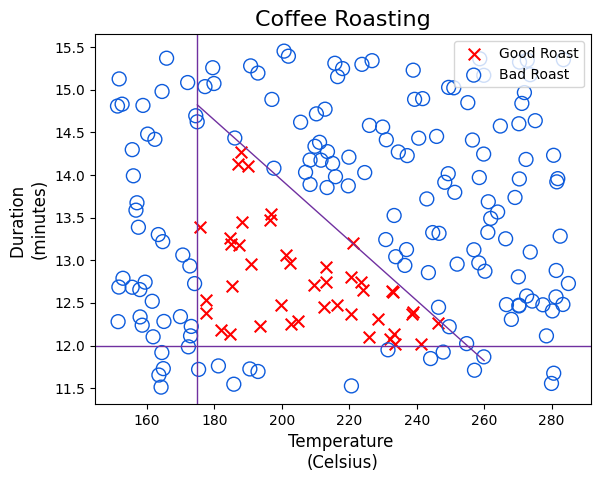

In [2]:
plt_roast(X, Y)

## Normalize Data


In [3]:
print(
    f"Temperature Max, Min pre normalization: {torch.max(X[:,0]):0.2f}, {torch.min(X[:,0]):0.2f}"
)
print(
    f"Duration    Max, Min pre normalization: {torch.max(X[:,1]):0.2f}, {torch.min(X[:,1]):0.2f}"
)
X_mean, X_std = X.mean(dim=0), X.std(dim=0)
Xn = (X - X_mean) / X_std
print(
    f"Temperature Max, Min post normalization: {torch.max(Xn[:,0]):0.2f}, {torch.min(Xn[:,0]):0.2f}"
)
print(
    f"Duration    Max, Min post normalization: {torch.max(Xn[:,1]):0.2f}, {torch.min(Xn[:,1]):0.2f}"
)

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.68
Duration    Max, Min post normalization: 1.79, -1.70


In [4]:
Xt = torch.tile(Xn, (1000, 1))
Yt = torch.tile(Y, (1000, 1))
print(Xt.shape, Yt.shape)

torch.Size([200000, 2]) torch.Size([200000, 1])


## Pytorch Model


In [5]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 3),
    torch.nn.Sigmoid(),
    torch.nn.Linear(3, 1),
    torch.nn.Sigmoid(),
)

model

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=3, out_features=1, bias=True)
  (3): Sigmoid()
)

In [6]:
W1, b1 = model[0].weight, model[0].bias
W2, b2 = model[2].weight, model[2].bias

print(W1)
print(b1)
print("\n")
print(W2)
print(b2)

Parameter containing:
tensor([[0.2900, 0.3692],
        [0.1530, 0.2825],
        [0.0150, 0.0424]], requires_grad=True)
Parameter containing:
tensor([ 0.0309, -0.3399, -0.5188], requires_grad=True)


Parameter containing:
tensor([[-0.2170,  0.3958, -0.0305]], requires_grad=True)
Parameter containing:
tensor([0.5275], requires_grad=True)


### Training Loop


In [7]:
cost_fun = torch.nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

epochs = 10
dataloader = DataLoader(TensorDataset(Xt, Yt), batch_size=32)

for epoch in range(epochs):
    print(f"epoch {epoch+1}/{epochs}")
    for i, (inputs, labels) in enumerate(dataloader):
        optimizer.zero_grad()

        output = model(inputs)

        loss = cost_fun(output, labels)

        loss.backward()

        optimizer.step()

    print("epoch {}, loss {}".format(epoch + 1, loss.item()))

epoch 1/10


epoch 1, loss 0.13369146089370124
epoch 2/10
epoch 2, loss 0.07306266116617639
epoch 3/10
epoch 3, loss 0.031647289644462465
epoch 4/10
epoch 4, loss 0.021447162369098445
epoch 5/10
epoch 5, loss 0.015281804219331552
epoch 6/10
epoch 6, loss 0.010754148365068193
epoch 7/10
epoch 7, loss 0.007422500953435133
epoch 8/10
epoch 8, loss 0.005061280035798237
epoch 9/10
epoch 9, loss 0.0034483396485950994
epoch 10/10
epoch 10, loss 0.0023716679634557336


### Updated Weights


In [8]:
W1, b1 = model[0].weight, model[0].bias
W2, b2 = model[2].weight, model[2].bias

print(W1)
print(b1)
print("\n")
print(W2)
print(b2)

Parameter containing:
tensor([[ 15.9553,  13.2628],
        [-11.4816,  -0.1723],
        [ -0.1784,  -8.7773]], requires_grad=True)
Parameter containing:
tensor([  2.0028, -12.6034, -10.8766], requires_grad=True)


Parameter containing:
tensor([[-43.2762, -54.9362, -47.7605]], requires_grad=True)
Parameter containing:
tensor([27.3353], requires_grad=True)


### Predictions


In [9]:
X_test = torch.tensor(
    [
        [200, 13.9],  # postive example
        [200, 17],
    ]
)  # negative example
X_testn = (X_test - X_mean) / X_std

predictions = model(X_testn)
print("decisions = \n", predictions > 0.5)

decisions = 
 tensor([[ True],
        [False]])
